# 6 Appendix - Code

In [31]:
import numpy as np  
import pandas as pd  

import matplotlib.pyplot as plt # For plots
#import matplotlib.pyplot.figure as fig

import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Load the data

In [2]:
df_vehicle = pd.read_csv("../uk_road_safety/data/2021/dft-road-casualty-statistics-vehicle-2021.csv", header=0,low_memory=False)
df_accident = pd.read_csv("../uk_road_safety/data/2021/dft-road-casualty-statistics-accident-2021.csv", header=0, low_memory=False)
df_casualty = pd.read_csv("../uk_road_safety/data/2021/dft-road-casualty-statistics-casualty-2021.csv", header=0, low_memory=False)

In [3]:
df_vehicle.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type', 'lsoa_of_driver'],
      dtype='object')

In [4]:
df_accident.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [5]:
df_casualty.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty'],
      dtype='object')

# Build the required dataframe

In [6]:

df_a_c = df_accident.merge(df_casualty,on='accident_index')
df_acv = df_a_c.merge(df_vehicle,on=['accident_index',"vehicle_reference"])

In [7]:
df_acv.columns

Index(['accident_index', 'accident_year_x', 'accident_reference_x',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'accident_year_y',
       'accident_reference_y', 'vehicle_reference', 'casualty_reference',


In [8]:
df_acv_selected_vars = df_acv[['accident_severity','casualty_severity','age_of_vehicle', 'engine_capacity_cc', 'number_of_vehicles', 
        'first_road_class', 
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 
       'trunk_road_flag', 
       'casualty_class', 'sex_of_casualty',
       'age_band_of_casualty',  'pedestrian_location',
       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver',
       'age_band_of_driver', 'propulsion_code',
       'driver_imd_decile',
       'driver_home_area_type']]

In [9]:
df_acv_selected_vars.head(20)

,accident_severity,casualty_severity,age_of_vehicle,engine_capacity_cc,number_of_vehicles,first_road_class,road_type,speed_limit,junction_detail,junction_control,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,driver_imd_decile,driver_home_area_type
0,3,3,3,999,3,6,6,30,9,4,...,0,0,1,1,6,1,4,1,10,1
1,2,3,11,2967,2,3,3,30,7,2,...,0,0,1,1,6,1,6,2,-1,-1
2,2,3,11,1598,2,3,3,30,7,2,...,0,0,1,1,6,1,5,1,3,1
3,2,2,11,1598,2,3,3,30,7,2,...,0,0,1,1,6,1,5,1,3,1
4,2,3,4,1998,2,4,6,30,9,2,...,0,0,4,1,1,1,6,8,2,1
5,2,2,2,1498,2,4,6,30,9,2,...,0,0,1,1,6,1,6,1,2,1
6,2,3,2,1498,2,4,6,30,9,2,...,0,0,1,1,6,1,6,1,2,1
7,2,3,2,1498,2,4,6,30,9,2,...,0,0,1,1,6,1,6,1,2,1
8,1,1,-1,-1,1,3,2,30,9,4,...,0,0,1,1,6,3,-1,-1,-1,-1
9,3,3,-1,-1,4,5,6,20,3,4,...,0,0,1,1,6,1,7,-1,3,1


In [10]:
df_a_all_rows = df_acv_selected_vars.copy()
df_a = df_a_all_rows[(df_a_all_rows != -1).all(1)]
print(df_a.shape)
print(df_a_all_rows.shape)

(38280, 48)
(128209, 48)


# Check the dataframes you created

In [43]:
df_pre_final_cut = df_a.copy()
df_pre_final_full = df_a_all_rows.copy()

In [44]:
# ALL ROWS Encode the Y variable with differnt optiins: Killed, Seriously Injured, or Both 
Y_all_rows = pd.get_dummies(data= df_pre_final_full["casualty_severity"],prefix='casualty_severity')
Y_all_rows['Y_KSI'] = Y_all_rows['casualty_severity_3'].eq(0).astype(int)
Y_all_rows.columns= ['Y_K', 'Y_SI', 'new_col3_to_Drop', 'Y_KSI']
Y_all_rows.drop('new_col3_to_Drop', axis=1, inplace=True)
df_pre_final_full.drop('accident_severity', axis=1, inplace=True)
df_pre_final_full.drop('casualty_severity', axis=1, inplace=True)

# CUT MISSNG VALUES Encode the Y variable with differnt optiins: Killed, Seriously Injured, or Both 
Y_cut = pd.get_dummies(data= df_pre_final_cut["casualty_severity"],prefix='casualty_severity')
Y_cut['Y_KSI'] = Y_cut['casualty_severity_3'].eq(0).astype(int)
Y_cut.columns= ['Y_K', 'Y_SI', 'new_col3_to_Drop', 'Y_KSI']
Y_cut.drop('new_col3_to_Drop', axis=1, inplace=True)
df_pre_final_cut.drop('accident_severity', axis=1, inplace=True)
df_pre_final_cut.drop('casualty_severity', axis=1, inplace=True)


In [45]:
print("Stats for the DF with ALL observations ")
print(Y_all_rows.sum())
print(Y_all_rows["Y_K"].size)

print("\nStats for the DF with missing observations removed")
print(Y_cut.sum())
print(Y_cut["Y_K"].size)

Stats for the DF with ALL observations 
Y_K       1558
Y_SI     23363
Y_KSI    24921
dtype: int64
128209

Stats for the DF with missing observations removed
Y_K       234
Y_SI     5500
Y_KSI    5734
dtype: int64
38280


# Select the datarame to be used for analysis

In [89]:
# SELECT UT DF TO USE FOR ANALYSIS
used_X = df_pre_final_cut
used_y= Y_cut['Y_KSI']

# SELECT FULL DF TO USE FOR ANALYSIS
#used_X = df_pre_final_full
#used_y= Y_all_rows['Y_KSI']

In [90]:
print(used_y.size)
used_X.columns


38280


Index(['age_of_vehicle', 'engine_capacity_cc', 'number_of_vehicles',
       'first_road_class', 'road_type', 'speed_limit', 'junction_detail',
       'junction_control', 'second_road_class',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'trunk_road_flag', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'pedestrian_location',
       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_objec

# Encode features

In [91]:
# Encode and bind + drop original feature function: 
# https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[feature_to_encode], prefix = feature_to_encode)
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)



In [96]:
used_X_encoded = used_X.copy()
features_to_encode = [
       'first_road_class', 'road_type', 'speed_limit', 'junction_detail',
       'junction_control', 'second_road_class',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'trunk_road_flag', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'pedestrian_location',
       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_band_of_driver',
       'propulsion_code', 'driver_imd_decile', 'driver_home_area_type']
for feature in features_to_encode:
    used_X_encoded = encode_and_bind(used_X_encoded, feature)

In [97]:
i = used_X_encoded.columns
len(i)

325

In [94]:
used_X_encoded = used_X_encoded[['speed_limit_20','second_road_class_2','weather_conditions_3'
,'weather_conditions_6','road_surface_conditions_5'
,'special_conditions_at_site_3','special_conditions_at_site_5'
,'special_conditions_at_site_6','carriageway_hazards_1','casualty_class_3'
,'age_band_of_casualty_1','age_band_of_casualty_2'
,'age_band_of_casualty_9','age_band_of_casualty_10'
,'age_band_of_casualty_11','pedestrian_location_0','pedestrian_location_2'
,'pedestrian_location_3','pedestrian_location_7','pedestrian_movement_0'
,'pedestrian_movement_5','pedestrian_movement_6','pedestrian_movement_7'
,'bus_or_coach_passenger_0','bus_or_coach_passenger_1'
,'bus_or_coach_passenger_2','bus_or_coach_passenger_4','casualty_type_0'
,'casualty_type_2','casualty_type_3','casualty_type_4','casualty_type_5'
,'casualty_type_9','casualty_type_10','casualty_type_11'
,'casualty_type_17','casualty_type_19','casualty_type_20'
,'casualty_type_21','casualty_type_23','casualty_type_90'
,'casualty_type_97','vehicle_type_2','vehicle_type_4','vehicle_type_5'
,'vehicle_type_8','vehicle_type_11','vehicle_type_17','vehicle_type_19'
,'vehicle_type_21','vehicle_type_23','vehicle_type_90','vehicle_type_97'
,'towing_and_articulation_0','towing_and_articulation_1'
,'towing_and_articulation_2','vehicle_manoeuvre_8','vehicle_manoeuvre_11'
,'vehicle_manoeuvre_15','vehicle_manoeuvre_16','vehicle_manoeuvre_17'
,'vehicle_manoeuvre_99','vehicle_location_restricted_lane_0'
,'vehicle_location_restricted_lane_1','vehicle_location_restricted_lane_5'
,'vehicle_location_restricted_lane_6','vehicle_location_restricted_lane_7'
,'vehicle_location_restricted_lane_9'
,'vehicle_location_restricted_lane_99','junction_location_0'
,'junction_location_7','skidding_and_overturning_2'
,'skidding_and_overturning_3','skidding_and_overturning_5'
,'hit_object_in_carriageway_1','hit_object_in_carriageway_6'
,'hit_object_in_carriageway_7','hit_object_in_carriageway_9'
,'hit_object_in_carriageway_99','vehicle_leaving_carriageway_0'
,'vehicle_leaving_carriageway_4','vehicle_leaving_carriageway_9'
,'hit_object_off_carriageway_1','hit_object_off_carriageway_2'
,'hit_object_off_carriageway_3','hit_object_off_carriageway_4'
,'hit_object_off_carriageway_8','hit_object_off_carriageway_9'
,'hit_object_off_carriageway_10','hit_object_off_carriageway_99'
,'vehicle_left_hand_drive_1','vehicle_left_hand_drive_9','sex_of_driver_1'
,'sex_of_driver_3','age_band_of_driver_3','propulsion_code_1'
,'propulsion_code_2','propulsion_code_6','propulsion_code_8'
,'propulsion_code_9']]

# Split data into training and tesing

In [98]:
## Laod and split the data
# Import modules
from sklearn.model_selection import train_test_split

# Specify locations of X and y
X = used_X_encoded.copy()
y = used_y
Xy = pd.concat([X.reset_index(drop=True), y], axis=1) #encoded
Xy_not_encoded = df_c = pd.concat([used_X.reset_index(drop=True), y], axis=1) #encoded
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=158158)

# Variable selection

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
#from sklearn.linear_model import RidgeCV

#ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train, y_train)
#importance = np.abs(ridge.coef_)
#feature_names = np.array(X_train.columns)
#plt.bar(height=importance, x=feature_names)
#plt.title("Feature importances via coefficients")
#plt.show()

In [37]:
# Helpers
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
# Models
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

In [85]:
# parameters for initial test
lda_params = [{}]
qda_params = [{}]
nb_params = [{}]
Bnb_params = [{}]
logReg_params = [{"max_iter":1000}]
knn_params = [ {"n_neighbors":3}]
rf_params = [ {"criterion":"entropy"}]
xgb_params = [ {"use_label_encoder":False}]
svc_params = [{}]
abc_params = [{}]
gradient_boost_params = [{}]
bagging_params = [{}]
models = [
    ["LDA", LinearDiscriminantAnalysis, lda_params],
    ["QDA", QuadraticDiscriminantAnalysis, qda_params],
    ["Naive Bayes", GaussianNB, nb_params],
    ["Bernoulli Naive Bayes", BernoulliNB, Bnb_params],
    ["Logistic Regression", LogisticRegression, logReg_params],
    ["KNN", KNeighborsClassifier, knn_params],
    ["RandomForest", RandomForestClassifier,rf_params],
    ["XGBoost", XGBClassifier,xgb_params],
    ["SVM Classifier", LinearSVC,svc_params],
    ["AdaBoost", AdaBoostClassifier,abc_params],
    ["GradientBoosting", GradientBoostingClassifier,gradient_boost_params],
    ["Bagging", BaggingClassifier,bagging_params]
    
]

In [67]:
from sklearn import model_selection

def error_metrics(model, train_data, train_targ, kfold):
    scoring = ["balanced_accuracy","f1", "precision", "recall"] 

    error_metrics = pd.DataFrame()
    error_metrics["model"] = model
    for scor in scoring:
        score = []
        for mod in model:
           
            result = model_selection.cross_val_score(estimator= mod, X=train_data, y=train_targ,cv=kfold,scoring=scor )
            score.append(result.mean())
            
        error_metrics[scor] =pd.Series(score)
        
    return error_metrics

In [68]:
# run all the models with multiple scoring
results = []
results_full = []
for modelname, Model, params_list in models:
    for params in params_list:
        print(modelname)
        model = Model(**params)
        model.fit(X_train, y_train.values.ravel())
        #score = model.score(X_test, y_test.values.ravel())
        scoring = {
           'precision': 'precision',
           'recall': 'recall',
                   'balanced_accuracy': 'balanced_accuracy',
                   'f1': 'f1',
                  }
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=158158158)

        scores = cross_validate(model, X_test, y_test, scoring=scoring,
                         cv=cv, return_train_score=False, n_jobs=-1)
        mean_scores = {k:np.round(float(sum(v))/len(v),5) for k, v in scores.items()}
    
        results.append((modelname, model, params, mean_scores))
        
from operator import itemgetter
results
#print(*sorted(results, key=itemgetter(3), reverse=True),sep="\n")

LDA
QDA


C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Naive Bayes
Bernoulli Naive Bayes
Logistic Regression
KNN
RandomForest
XGBoost
[19:05:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
SVM Classifier
AdaBoost
GradientBoosting
Bagging


[('LDA',
  LinearDiscriminantAnalysis(),
  {},
  {'fit_time': 0.18045,
   'score_time': 0.0079,
   'test_precision': 0.46816,
   'test_recall': 0.18617,
   'test_balanced_accuracy': 0.57411,
   'test_f1': 0.26528}),
 ('QDA',
  QuadraticDiscriminantAnalysis(),
  {},
  {'fit_time': 0.0965,
   'score_time': 0.0143,
   'test_precision': 0.15374,
   'test_recall': 0.97865,
   'test_balanced_accuracy': 0.50297,
   'test_f1': 0.26573}),
 ('Naive Bayes',
  GaussianNB(),
  {},
  {'fit_time': 0.0228,
   'score_time': 0.0054,
   'test_precision': 0.169,
   'test_recall': 0.95815,
   'test_balanced_accuracy': 0.55363,
   'test_f1': 0.28731}),
 ('Bernoulli Naive Bayes',
  BernoulliNB(),
  {},
  {'fit_time': 0.0176,
   'score_time': 0.0057,
   'test_precision': 0.36942,
   'test_recall': 0.39796,
   'test_balanced_accuracy': 0.63707,
   'test_f1': 0.38227}),
 ('Logistic Regression',
  LogisticRegression(max_iter=1000),
  {'max_iter': 1000},
  {'fit_time': 0.45026,
   'score_time': 0.0054,
   'test_p

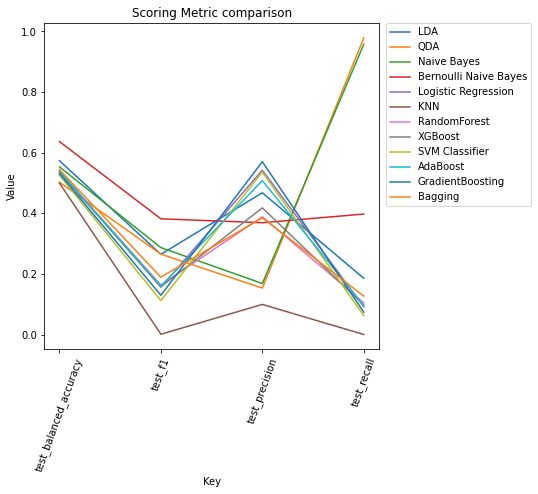

In [69]:
labels = []
for a,b,c,d in results:
    myList = d.items()
    myList = sorted(myList)[2:]
    x, y = zip(*myList)
    plt.plot(x, y)
    labels.append(a)
plt.xlabel('Key')
plt.ylabel('Value')
plt.title('Scoring Metric comparison')
plt.rcParams['figure.figsize'] = [6, 6]
plt.xticks(rotation=70)
plt.legend(labels, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.legend(labels)
plt.show()    

[('score_time', 0.03953),
 ('test_acc', 0.84012),
 ('test_balanced_accuracy', 0.54664),
 ('test_f1', 0.19012),
 ('test_f1_micro', 0.84012),
 ('test_precision', 0.42124),
 ('test_recall', 0.12382),
 ('test_roc_auc', 0.68342)]

LDA


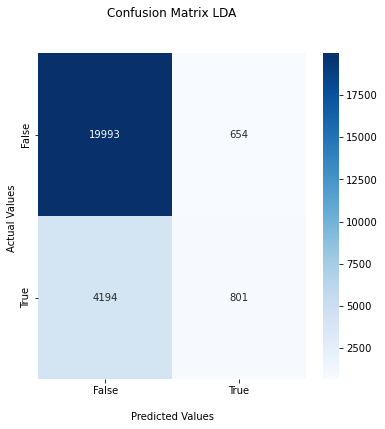

              precision    recall  f1-score   support

           0       0.83      0.97      0.89     20647
           1       0.55      0.16      0.25      4995

    accuracy                           0.81     25642
   macro avg       0.69      0.56      0.57     25642
weighted avg       0.77      0.81      0.77     25642



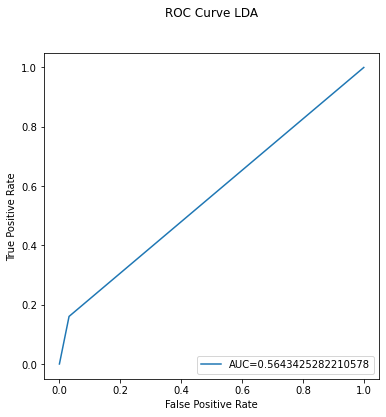

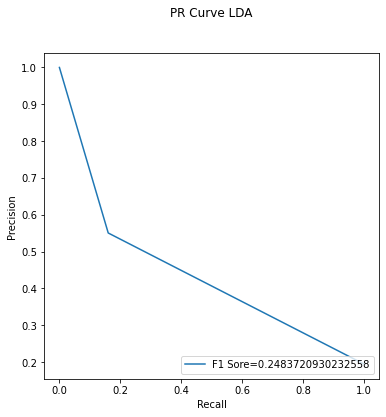

QDA


C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


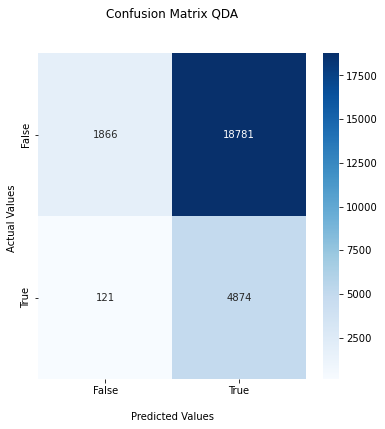

              precision    recall  f1-score   support

           0       0.94      0.09      0.16     20647
           1       0.21      0.98      0.34      4995

    accuracy                           0.26     25642
   macro avg       0.57      0.53      0.25     25642
weighted avg       0.80      0.26      0.20     25642



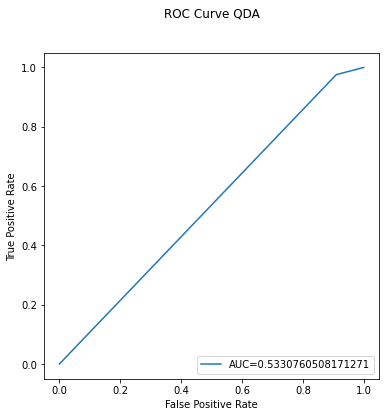

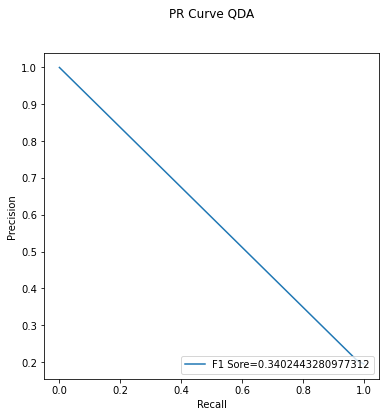

Naive Bayes


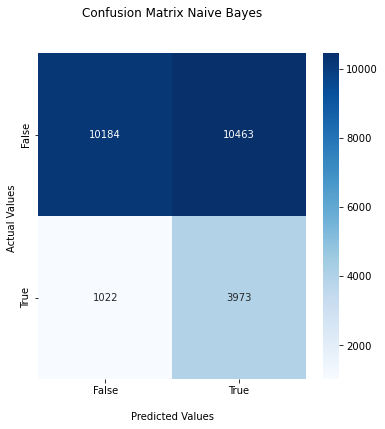

              precision    recall  f1-score   support

           0       0.91      0.49      0.64     20647
           1       0.28      0.80      0.41      4995

    accuracy                           0.55     25642
   macro avg       0.59      0.64      0.52     25642
weighted avg       0.79      0.55      0.59     25642



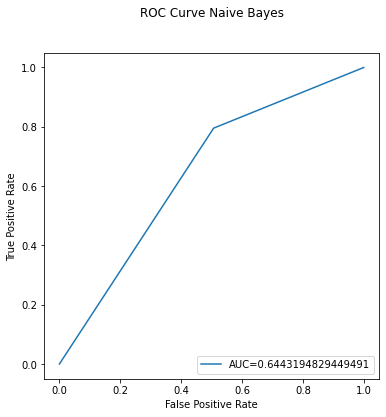

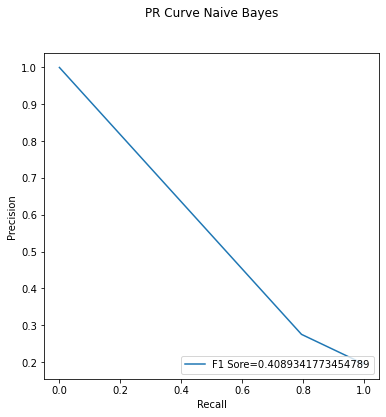

Bernoulli Naive Bayes


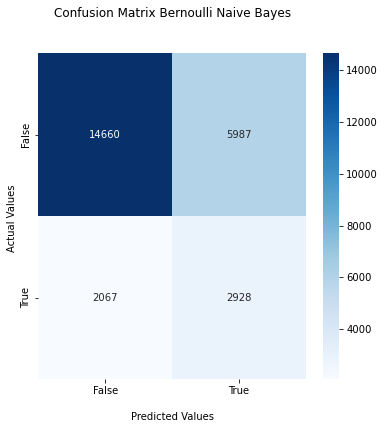

              precision    recall  f1-score   support

           0       0.88      0.71      0.78     20647
           1       0.33      0.59      0.42      4995

    accuracy                           0.69     25642
   macro avg       0.60      0.65      0.60     25642
weighted avg       0.77      0.69      0.71     25642



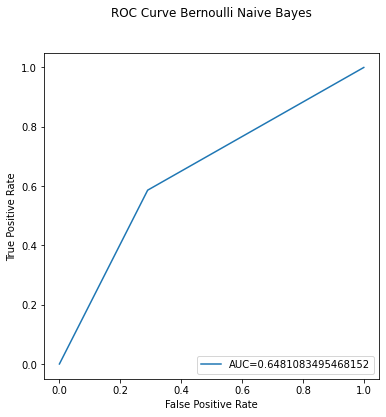

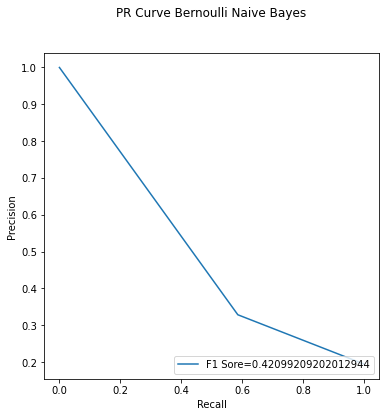

Logistic Regression


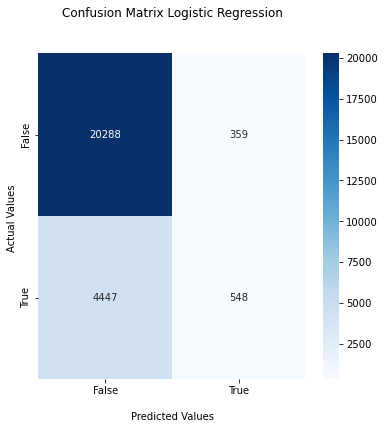

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     20647
           1       0.60      0.11      0.19      4995

    accuracy                           0.81     25642
   macro avg       0.71      0.55      0.54     25642
weighted avg       0.78      0.81      0.76     25642



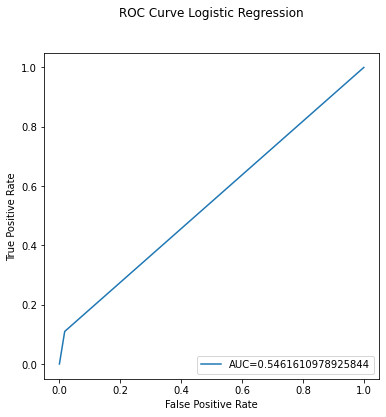

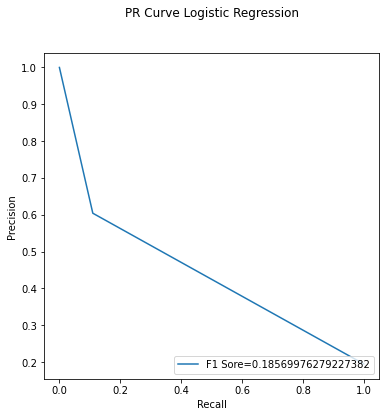

KNN


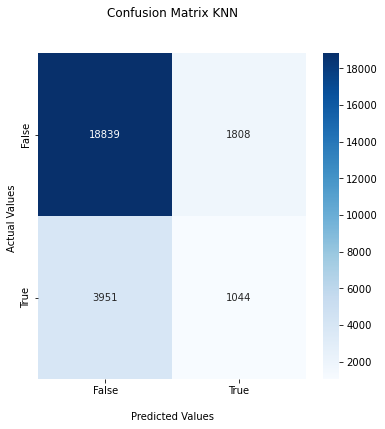

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     20647
           1       0.37      0.21      0.27      4995

    accuracy                           0.78     25642
   macro avg       0.60      0.56      0.57     25642
weighted avg       0.74      0.78      0.75     25642



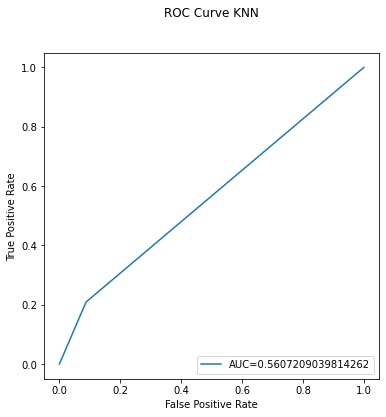

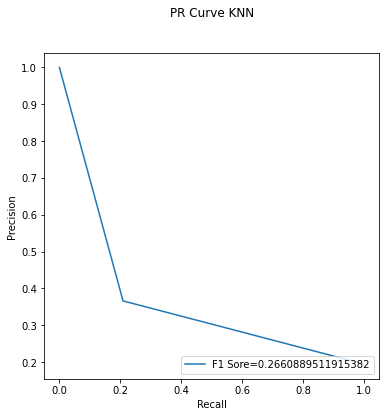

RandomForest


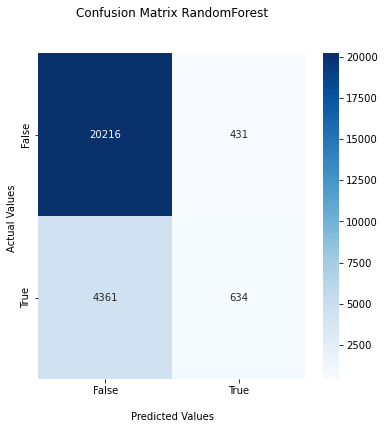

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     20647
           1       0.60      0.13      0.21      4995

    accuracy                           0.81     25642
   macro avg       0.71      0.55      0.55     25642
weighted avg       0.78      0.81      0.76     25642



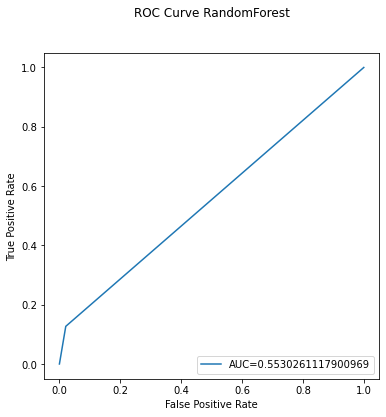

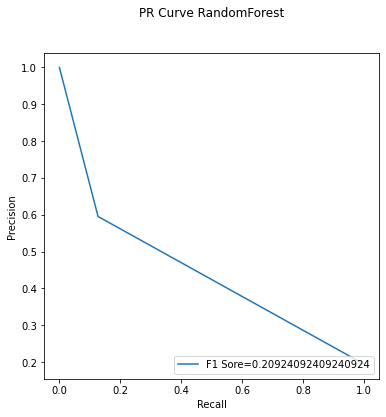

XGBoost
[19:28:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


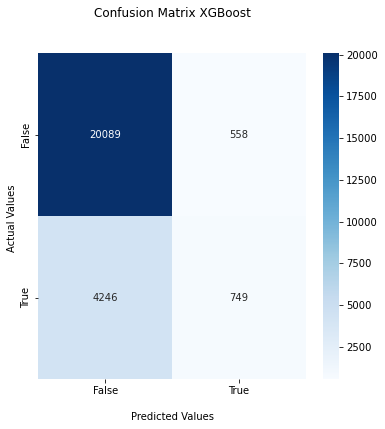

              precision    recall  f1-score   support

           0       0.83      0.97      0.89     20647
           1       0.57      0.15      0.24      4995

    accuracy                           0.81     25642
   macro avg       0.70      0.56      0.57     25642
weighted avg       0.78      0.81      0.77     25642



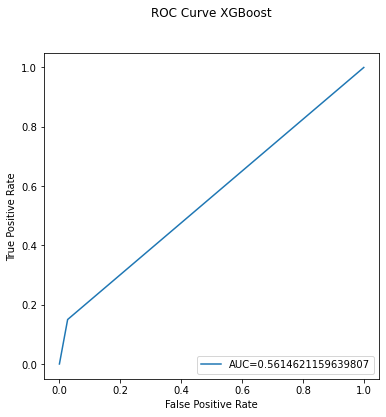

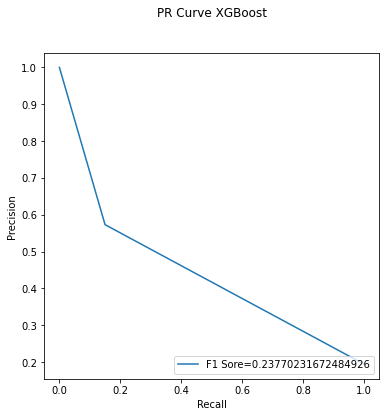

SVM Classifier


C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


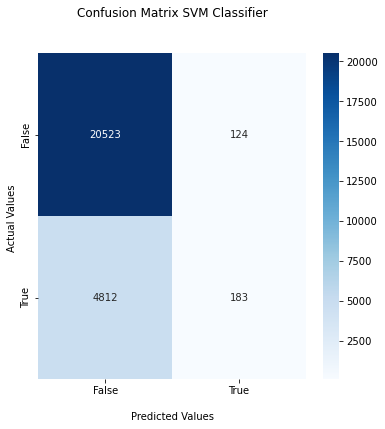

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     20647
           1       0.60      0.04      0.07      4995

    accuracy                           0.81     25642
   macro avg       0.70      0.52      0.48     25642
weighted avg       0.77      0.81      0.73     25642



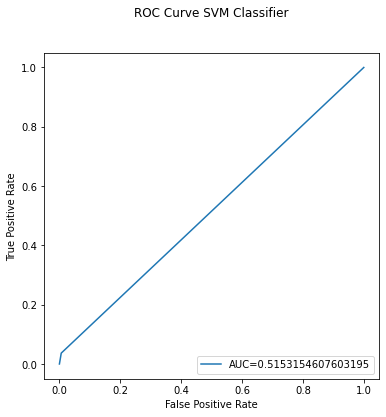

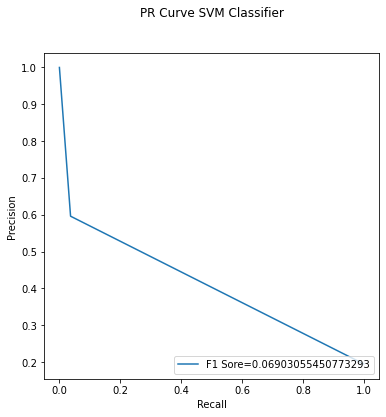

AdaBoost


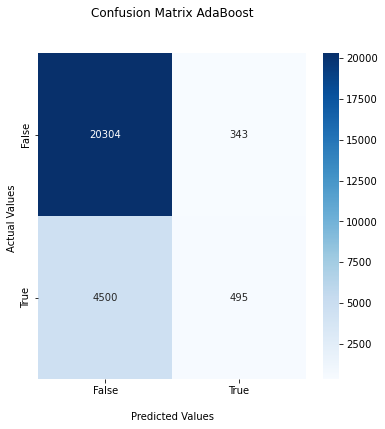

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     20647
           1       0.59      0.10      0.17      4995

    accuracy                           0.81     25642
   macro avg       0.70      0.54      0.53     25642
weighted avg       0.77      0.81      0.75     25642



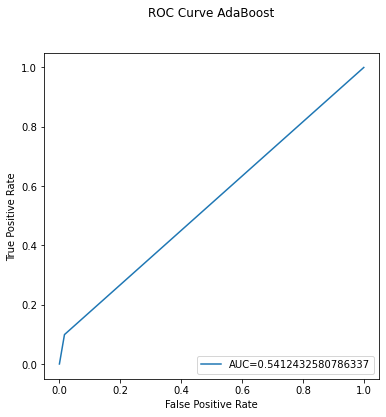

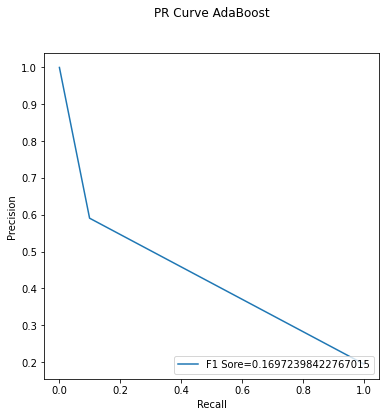

GradientBoosting


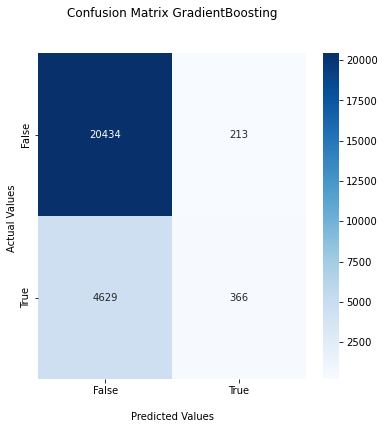

              precision    recall  f1-score   support

           0       0.82      0.99      0.89     20647
           1       0.63      0.07      0.13      4995

    accuracy                           0.81     25642
   macro avg       0.72      0.53      0.51     25642
weighted avg       0.78      0.81      0.75     25642



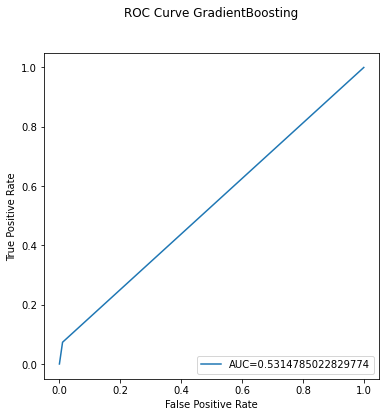

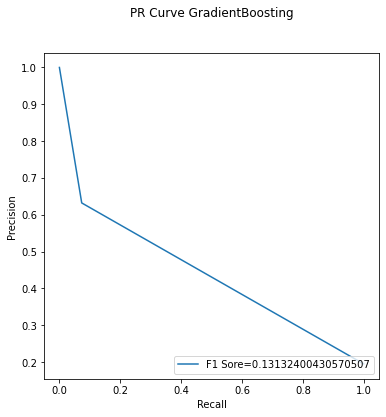

Bagging


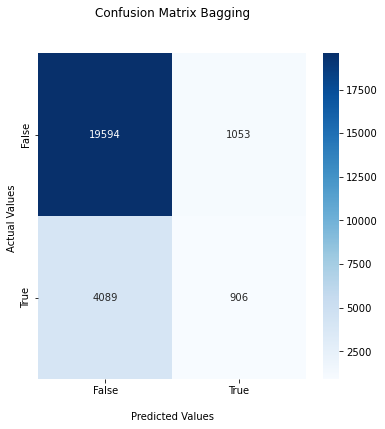

              precision    recall  f1-score   support

           0       0.83      0.95      0.88     20647
           1       0.46      0.18      0.26      4995

    accuracy                           0.80     25642
   macro avg       0.64      0.57      0.57     25642
weighted avg       0.76      0.80      0.76     25642



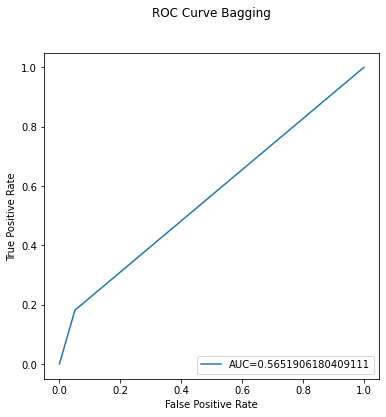

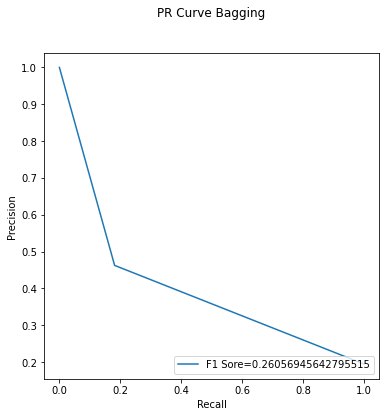

('Bernoulli Naive Bayes', BernoulliNB(), {}, 0.6456848060903985, 0.3284352215367358, 0.5861861861861862, 0.42099209202012944, 4995)
('Naive Bayes', GaussianNB(), {}, 0.6315690958272195, 0.2752147409254641, 0.7953953953953954, 0.4089341773454789, 4995)
('LDA', LinearDiscriminantAnalysis(), {}, 0.5661576771398532, 0.5505154639175258, 0.16036036036036036, 0.2483720930232558, 4995)
('XGBoost', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_lab

In [88]:
# run all the models
results = []
results_full = []
for modelname, Model, params_list in models:
    for params in params_list:
        print(modelname)
        model = Model(**params)
        model.fit(X_train, y_train.values.ravel())
        #score = model.score(X_test, y_test.values.ravel())
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=158158158)
        scores = cross_val_score(model, X_test, y_test, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
        cv_score = (np.mean(scores)) 

        # Confusion matrix
        y_pred = model.predict(X_test)
        cf_matrix = confusion_matrix(y_test, y_pred)
        #print(cf_matrix)
        ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')
        ax.set_title('Confusion Matrix '+ modelname +'\n\n');
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values ');
        ## Ticket labels - List must be in alphabetical order
        ax.xaxis.set_ticklabels(['False','True'])
        ax.yaxis.set_ticklabels(['False','True'])
        ## Display the visualization of the Confusion Matrix.
        plt.show()
        print(classification_report(y_test, y_pred))
        report = classification_report(y_test, y_pred, output_dict = True)
        results.append((modelname, model, params, cv_score, report['1']["precision"],report['1']["recall"],report['1']["f1-score"],report['1']["support"])) 
        results_full.append((modelname, model, params, cv_score, report, cf_matrix))
        
                
        #define metrics
        fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
        auc = metrics.roc_auc_score(y_test, y_pred)
        #create ROC curve
        plt.plot(fpr,tpr,label="AUC="+str(auc))
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc=4)
        plt.title('ROC Curve '+ modelname +'\n\n');
        plt.show()
        
        #define metrics
        precision, recall, _ = metrics.precision_recall_curve(y_test,  y_pred)
        pr = metrics.f1_score(y_test, y_pred)
        #create ROC curve
        plt.plot(recall,precision,label="F1 Sore="+str(pr))
        plt.ylabel('Precision')
        plt.xlabel('Recall')
        plt.legend(loc=4)
        plt.title('PR Curve '+ modelname +'\n\n');
        plt.show()

        
from operator import itemgetter
print(*sorted(results, key=itemgetter(3), reverse=True),sep="\n")

(0.255047821466525, 0.11294117647058824, 0.15655577299412915, 2125)

In [34]:
# Select best k neighbors for KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(2, 25))
grid_param = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, grid_param, cv=2, scoring='f1', return_train_score=False,verbose=3)
  
# fitting the model for grid search
search_grid=grid.fit(X_train, y_train.values.ravel())
print(search_grid.best_params_)

Fitting 2 folds for each of 23 candidates, totalling 46 fits
[CV 1/2] END .....................n_neighbors=2;, score=0.101 total time=   3.9s
[CV 2/2] END .....................n_neighbors=2;, score=0.130 total time=   3.7s
[CV 1/2] END .....................n_neighbors=3;, score=0.183 total time=   4.0s
[CV 2/2] END .....................n_neighbors=3;, score=0.219 total time=   4.0s
[CV 1/2] END .....................n_neighbors=4;, score=0.094 total time=   5.7s
[CV 2/2] END .....................n_neighbors=4;, score=0.105 total time=   5.4s
[CV 1/2] END .....................n_neighbors=5;, score=0.143 total time=   5.1s
[CV 2/2] END .....................n_neighbors=5;, score=0.163 total time=   5.4s
[CV 1/2] END .....................n_neighbors=6;, score=0.079 total time=   5.1s
[CV 2/2] END .....................n_neighbors=6;, score=0.082 total time=   5.6s
[CV 1/2] END .....................n_neighbors=7;, score=0.124 total time=   5.1s
[CV 2/2] END .....................n_neighbors=7;

In [115]:
# Hyperparamater Tuning
lda_grid = [{"solver": [ 'lsqr'],
            "shrinkage": np.linspace(0, 1, 100)},
           {"solver": ['svd']}]

logReg_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-10, 10, 20),
     'l1_ratio' : [0, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'solver' : ['saga'],
    'max_iter' : [2500]
    },
    #{'penalty' : [ 'l2', 'none'],
    #'C' : np.logspace(-10, 10, 20),
    #'solver' : ['newton-cg','lbfgs','sag',],
    #'max_iter' : [2500]
    #},
    #{'penalty' : ['l1', 'l2'],
    #'C' : np.logspace(-10, 10, 20),
    #'solver' : ['liblinear'],
    #'max_iter' : [2500]
    #}
]

rf_grid = [ {"criterion":["gini"],
             'bootstrap': [True, False],
             'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
           'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 2, 4],
           'min_samples_split': [2, 5, 10],
           'n_estimators': [200, 500, 750, 1000, 1500, 1800, 2000]}]

xgb_grid = [{
"max_depth": [3, 4, 7, 10, 25],
"gamma": [0.5, 1, 5, 10, 25],
"min_child_weight": [1, 3, 5, 10, 25],
"reg_lambda": [5, 10, 50, 100, 300],
"scale_pos_weight": [1, 3, 5, 10, 25],
"use_label_encoder": [False]
}]

svc_grid = [{'penalty':[ 'l2'], 'C': [1., 10., 100.]}]

abc_grid = [{'n_estimators': [20, 50, 70, 100, 200],
             'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 1, 10]
    }]

gb_grid = [{    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100],
    "max_features": list(range(1,X_train.shape[1]))}]

nb_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

bnb_grid = {
    'alpha': np.logspace(0,1, num=1000)
}

tuned_models = [
    #["LDA", LinearDiscriminantAnalysis, lda_grid],
    #["Logistic Regression", LogisticRegression, logReg_grid],
    #["RandomForest", RandomForestClassifier,rf_grid],
    ["XGBoost", XGBClassifier,xgb_grid],
    #["SVM Classifier", LinearSVC,svc_grid],
    #["AdaBoost", AdaBoostClassifier,abc_grid],
    #["GradientBoosting", GradientBoostingClassifier, gb_grid],
    ['Gauss Naive Bayes', GaussianNB, nb_grid],
    ['Bern Naive Bayes', BernoulliNB, bnb_grid]
    
]



In [116]:
# HALVING CV run all the models

#####################
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

results_tuned = []
for modelname, Model, grid_list in tuned_models:
    
    print(modelname)
    #print(grid_list)
    
    model = Model()
    halving_cv = HalvingGridSearchCV(model, grid_list, scoring="balanced_accuracy", n_jobs=-1, 
                                     min_resources="exhaust", factor=3,verbose=4, cv=3, error_score= np.nan)
    halving_cv.fit(X_train, y_train.values.ravel())
    best_params = halving_cv.best_params_
    print(best_params)
    best_score = halving_cv.best_score_
    print(best_score)
    #score = model.score(X_test, y_test.values.ravel())
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=158158158)

    scores = cross_val_score(model, X_test, y_test, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    cv_score = (np.mean(scores))  
    results_tuned.append((modelname, model, best_params, best_score, cv_score))
from operator import itemgetter
print(*sorted(results_tuned, key=itemgetter(3), reverse=True),sep="\n")




XGBoost
n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 14
max_resources_: 30624
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3125
n_resources: 14
Fitting 3 folds for each of 3125 candidates, totalling 9375 fits
----------
iter: 1
n_candidates: 1042
n_resources: 42
Fitting 3 folds for each of 1042 candidates, totalling 3126 fits
----------
iter: 2
n_candidates: 348
n_resources: 126
Fitting 3 folds for each of 348 candidates, totalling 1044 fits
----------
iter: 3
n_candidates: 116
n_resources: 378
Fitting 3 folds for each of 116 candidates, totalling 348 fits
----------
iter: 4
n_candidates: 39
n_resources: 1134
Fitting 3 folds for each of 39 candidates, totalling 117 fits
----------
iter: 5
n_candidates: 13
n_resources: 3402
Fitting 3 folds for each of 13 candidates, totalling 39 fits
----------
iter: 6
n_candidates: 5
n_resources: 10206
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 7
n_candid

In [112]:
results_tuned

[('LDA',
  LinearDiscriminantAnalysis(),
  {'shrinkage': 0.0, 'solver': 'lsqr'},
  0.5783303185455436,
  0.5847793175123683),
 ('XGBoost',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None,
                enable_categorical=False, gamma=None, gpu_id=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, reg_alpha=None,
                reg_lambda=None, scale_pos_weight=None, subsample=None,
                tree_method=None, validate_parameters=None, verbosity=None),
  {'gamma': 0.5,
   'max_depth': 7,
   'min_child_weight': 10,
   'reg_lambda': 300,
   'scale_pos_weight': 10,
   'use_label_encoder': False},
  0.690815

In [118]:
BernoulliNB(), {'alpha': 1.2447871461879063}

final_model = BernoulliNB(alpha= 1.2447871461879063)
final_model.fit(X_train, y_train.values.ravel())

BernoulliNB(alpha=1.2447871461879063)

In [138]:
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split



imps = permutation_importance(final_model, X_test, y_test)
print(imps.importances_mean)

[ 2.61233020e-05  0.00000000e+00  0.00000000e+00 -2.08986416e-04
 -2.61233020e-05 -5.74712644e-04 -1.28004180e-03 -2.87356322e-04
  7.83699060e-05 -8.09822362e-04 -1.04493208e-04 -8.35945664e-04
 -2.95193312e-03 -1.04493208e-04 -1.67189133e-03 -9.66562173e-04
  0.00000000e+00 -8.88192268e-04 -9.66562173e-04 -1.48902821e-03
  1.56739812e-04  0.00000000e+00 -9.66562173e-04 -1.04493208e-04
 -1.41065831e-03 -2.61233020e-04  2.08986416e-04 -2.87356322e-04
  2.61233020e-05 -6.26959248e-04 -1.95924765e-03 -2.61233020e-05
 -2.50783699e-03  3.13479624e-04 -4.36259143e-03 -1.59352142e-03
  0.00000000e+00 -2.61233020e-04  0.00000000e+00 -1.82863114e-04
  2.61233020e-05 -1.04493208e-04 -4.70219436e-04 -1.56739812e-03
 -7.83699060e-05  0.00000000e+00 -2.89968652e-03 -2.19435737e-03
 -5.22466040e-05  1.04493208e-04 -1.80250784e-03  1.30616510e-04
  2.35109718e-04 -2.29885057e-03  1.30616510e-04 -3.65726228e-04
  0.00000000e+00 -3.65726228e-04 -1.30616510e-04 -7.05329154e-04
 -3.65726228e-04 -1.30616

In [139]:
from sklearn.inspection import permutation_importance
r = permutation_importance(final_model, X_test, y_test,
                            n_repeats=10,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_test.columns[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

pedestrian_location_00.006 +/- 0.001
casualty_class_30.006 +/- 0.001
pedestrian_movement_00.006 +/- 0.001
casualty_type_00.006 +/- 0.001
vehicle_type_50.004 +/- 0.001
casualty_type_50.004 +/- 0.001
casualty_class_10.003 +/- 0.001
pedestrian_location_50.002 +/- 0.001
pedestrian_movement_10.002 +/- 0.001
casualty_type_190.001 +/- 0.000
pedestrian_movement_30.001 +/- 0.001
pedestrian_location_10.001 +/- 0.000
first_road_class_60.001 +/- 0.000
pedestrian_location_80.001 +/- 0.000
pedestrian_movement_70.000 +/- 0.000
driver_imd_decile_40.000 +/- 0.000
vehicle_type_900.000 +/- 0.000
casualty_type_900.000 +/- 0.000
bus_or_coach_passenger_20.000 +/- 0.000


In [136]:
X_train.columns[pos_class_prob_sorted[2:15]]

Index(['towing_and_articulation_0', 'vehicle_left_hand_drive_1',
       'bus_or_coach_passenger_0', 'carriageway_hazards_0',
       'pedestrian_road_maintenance_worker_0', 'special_conditions_at_site_0',
       'pedestrian_crossing_human_control_0', 'trunk_road_flag_2',
       'vehicle_location_restricted_lane_0', 'age_of_vehicle',
       'hit_object_in_carriageway_0', 'car_passenger_0',
       'hit_object_off_carriageway_0'],
      dtype='object')

In [141]:

optimal_models = [('Bernoulli NB', BernoulliNB, [{"alpha": 1.2447871461879063}], 0.7786038941859323, 0.7649875797559693),
    
                
   
                  ]
                  

Bernoulli NB


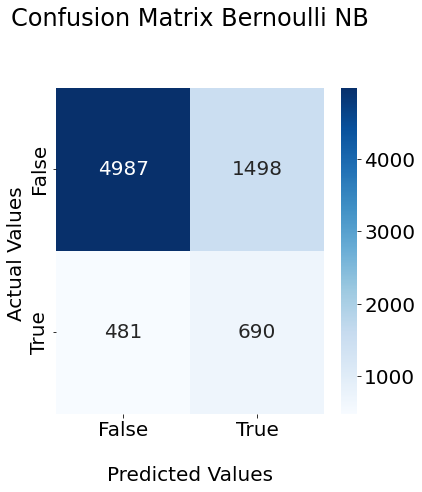

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      6485
           1       0.32      0.59      0.41      1171

    accuracy                           0.74      7656
   macro avg       0.61      0.68      0.62      7656
weighted avg       0.82      0.74      0.77      7656



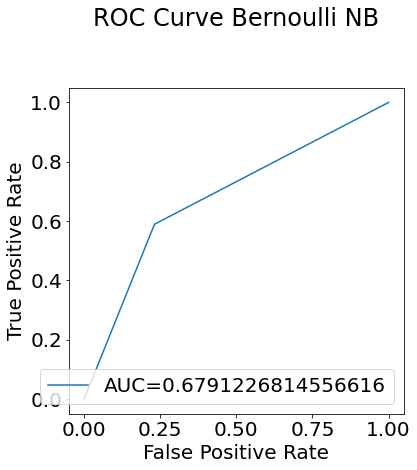

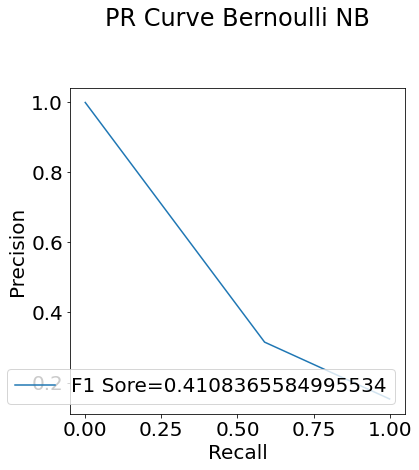

('Bernoulli NB', BernoulliNB(alpha=1.2447871461879063), {'alpha': 1.2447871461879063}, 0.6754249817456032, 0.3153564899451554, 0.5892399658411615, 0.4108365584995534, 1171)


In [148]:
final_results = []
for modelname, Model, params_list, ignore1, ignore2 in optimal_models:
    for params in params_list:
        print(modelname)
        model = Model(**params)
        model.fit(X_train, y_train.values.ravel())
        #score = model.score(X_test, y_test.values.ravel())
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=158158158)
        scores = cross_val_score(model, X_test, y_test, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
        cv_score = (np.mean(scores)) 

        # Confusion matrix
        y_pred = model.predict(X_test)
        cf_matrix = confusion_matrix(y_test, y_pred)
        #print(cf_matrix)
        ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')
        ax.set_title('Confusion Matrix '+ modelname +'\n\n');
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values ');
        ## Ticket labels - List must be in alphabetical order
        ax.xaxis.set_ticklabels(['False','True'])
        ax.yaxis.set_ticklabels(['False','True'])
        ## Display the visualization of the Confusion Matrix.
        plt.show()
        print(classification_report(y_test, y_pred))
        report = classification_report(y_test, y_pred, output_dict = True)
        final_results.append((modelname, model, params, cv_score, report['1']["precision"],report['1']["recall"],report['1']["f1-score"],report['1']["support"])) 
        results_full.append((modelname, model, params, cv_score, report, cf_matrix))
        
                
        #define metrics
        fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
        auc = metrics.roc_auc_score(y_test, y_pred)
        #create ROC curve
        plt.plot(fpr,tpr,label="AUC="+str(auc))
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc=4)
        plt.title('ROC Curve '+ modelname +'\n\n');
        plt.show()
        
        #define metrics
        precision, recall, _ = metrics.precision_recall_curve(y_test,  y_pred)
        pr = metrics.f1_score(y_test, y_pred)
        #create ROC curve
        plt.plot(recall,precision,label="F1 Sore="+str(pr))
        plt.ylabel('Precision')
        plt.xlabel('Recall')
        plt.legend(loc=4)
        plt.title('PR Curve '+ modelname +'\n\n');
        plt.rc('font', size=20)
        plt.show()

        
from operator import itemgetter
print(*sorted(final_results, key=itemgetter(3), reverse=True),sep="\n")

In [147]:
final_results

[]

In [ ]:
# fit best model
adaboost_cf = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 100)
# train the model
adaboost_cf.fit(X_train, y_train)
y_pred = adaboost_cf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

In [ ]:
# Visualise confusion matrix


ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()